#Este notebook faz uso da base de dados MIT-BIH Atrial Fibrillation Database

http://ecg.mit.edu/george/publications/afib-cinc-1983.pdf

Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220.

In [2]:
from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

!pip install wfdb
import wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 628.1 kB/s eta 0:00:00


#Data Description
Of these, 23 records include the two ECG signals (in the .dat files); records 00735 and 03665 are represented only by the rhythm (.atr) and unaudited beat (.qrs annotation files.)<br>

RECORD ANNOTATIONS:<br>

.atr - rhythm<br>
.qrs - beat (generated by detector)<br>
.qrsc - beat (corrected manually)<br>


Record lido com sucesso.
Número de sinais: 2
Taxa de amostragem: 250
Duração do registro (em amostras): 9205760
Sinais: [[-0.015 -0.32 ]
 [-0.045 -0.35 ]
 [-0.03  -0.345]
 ...
 [ 0.12  -0.195]
 [ 0.085 -0.21 ]
 [ 0.055 -0.255]]


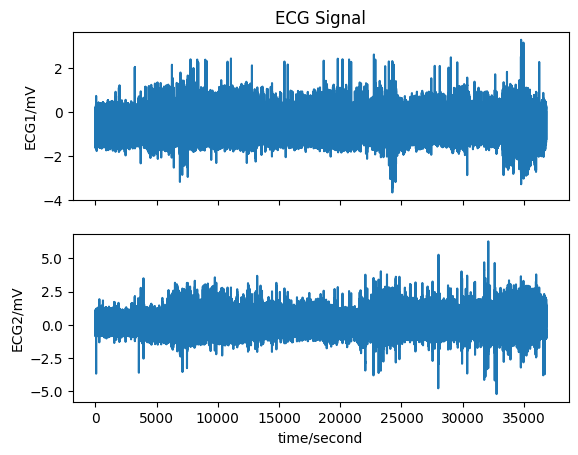

[     42  413691  447761 1023430 1027876 1091766 1105884 1115502 1151702
 1174135 1189343 1203805 1204431 1205494 1316329 1333475 1352712 1364357
 1382500 1393567 1406691 1430321 1668404 1694048 1890996 1904539 1905745
 1936943 2047170 2068111 2102388 2119395 2138828 2147935 2280889 2303975
 2464067 2494806 2498353 2506461 3130658 3165666 4753217 4781740 4792439
 4804448 4901634 4917777 5080723 5100410 5110361 5118731 5523273 5548092
 5687293 5724606 5953276 5981405 5984044 5990301 5992459 5995465 7325787
 7366279 7453005 7490747 7582421 7609874 7612044 7619457 8269228 8311034
 8358031]
['+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+']


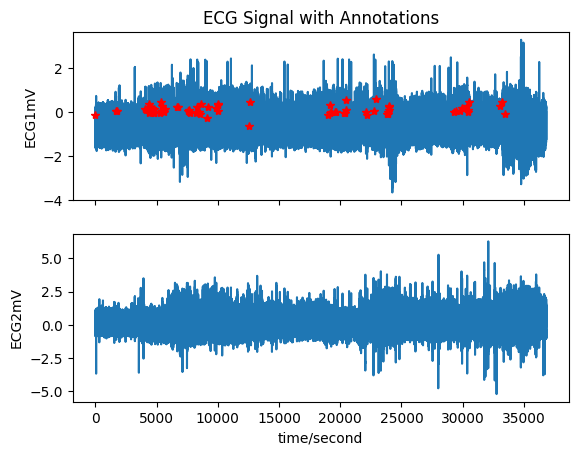

In [ ]:
# LEITURA E VISUALIZAÇÃO DOS REGISTROS DE SINAL

try:
    record = wfdb.rdrecord("/content/04936")
    print("Record lido com sucesso.")
    print("Número de sinais:", record.n_sig)
    print("Taxa de amostragem:", record.fs)
    print("Duração do registro (em amostras):", record.sig_len)
    print("Sinais:", record.p_signal)
except Exception as e:
    print("Erro ao ler o registro:", e)

if record.p_signal is not None:
    # Plotar o sinal se estiver presente
    wfdb.plot_wfdb(record=record, title="ECG Signal")
else:
    print("O registro não contém sinais.")

# Carregar anotações associadas ao registro
annotation = wfdb.rdann("/content/04936", "atr")

# Exibir as anotações
print(annotation.sample)
print(annotation.symbol)

# Plotar o sinal com anotações
wfdb.plot_wfdb(
    record=record, annotation=annotation, title="ECG Signal with Annotations"
)
plt.show()

In [4]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import wfdb
import os
import matplotlib.pyplot as plt

# Caminho para a pasta de dados
data_path = "/content/drive/Shareddrives/PETDRIVE-CAUB/DETECÇÃO DE FIBRILAÇÃO ATRIAL EM ECG/IMPLEMENTAÇÕES/record"

# Lista todos os subdiretórios em data_path
record_directories = [
    os.path.join(data_path, d)
    for d in os.listdir(data_path)
    if os.path.isdir(os.path.join(data_path, d))
]


# Função para ler e plotar um registro
def read_and_plot_record(record_path):
    try:
        # Obtenha o nome do registro (nome do arquivo sem extensão)
        record_name = os.path.basename(record_path)

        # Ler o registro
        record = wfdb.rdrecord(record_path)

        # Verificar se o registro contém sinais
        if record.p_signal is not None:
            # Plotar o sinal
            wfdb.plot_wfdb(record=record, title=f"ECG Signal - {record_name}")
            plt.show()
        else:
            print(f"O registro {record_name} não contém sinais.")
    except Exception as e:
        print(f"Erro ao ler o registro {record_name}: {e}")


# Loop através de cada subdiretório e leia os registros
for record_dir in record_directories:
    # Obter o nome base do registro (presume que o nome do arquivo é o mesmo que o nome do diretório)
    record_name = os.path.basename(record_dir)
    record_path = os.path.join(record_dir, record_name)

    # Ler e plotar o registro
    read_and_plot_record(record_path)

Erro ao ler o registro record3: [Errno 2] No such file or directory: '/content/drive/Shareddrives/PETDRIVE-CAUB/DETECÇÃO DE FIBRILAÇÃO ATRIAL EM ECG/IMPLEMENTAÇÕES/record/record3/04015.dat'
Erro ao ler o registro record8: [Errno 2] No such file or directory: '/content/drive/Shareddrives/PETDRIVE-CAUB/DETECÇÃO DE FIBRILAÇÃO ATRIAL EM ECG/IMPLEMENTAÇÕES/record/record8/04908.dat'
Erro ao ler o registro record4: [Errno 2] No such file or directory: '/content/drive/Shareddrives/PETDRIVE-CAUB/DETECÇÃO DE FIBRILAÇÃO ATRIAL EM ECG/IMPLEMENTAÇÕES/record/record4/04043.dat'
Erro ao ler o registro record9: [Errno 2] No such file or directory: '/content/drive/Shareddrives/PETDRIVE-CAUB/DETECÇÃO DE FIBRILAÇÃO ATRIAL EM ECG/IMPLEMENTAÇÕES/record/record9/04936.dat'
Erro ao ler o registro record25: [Errno 2] No such file or directory: '/content/drive/Shareddrives/PETDRIVE-CAUB/DETECÇÃO DE FIBRILAÇÃO ATRIAL EM ECG/IMPLEMENTAÇÕES/record/record25/08455.dat'
Erro ao ler o regi

In [23]:
import os


def find_file_path(root_dir, file_name):
    """
    Procura um arquivo específico em um diretório e suas subpastas.

    :param root_dir: Caminho do diretório raiz onde a busca será realizada.
    :param file_name: Nome do arquivo a ser procurado.
    :return: Caminho completo do arquivo se encontrado, caso contrário, None.
    """
    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if file == file_name:
                return os.path.join(subdir, file)
    return None


# Exemplo de uso

# Variável que contém o nome do arquivo .hea
file = "record1.hea"

# Caminho para a pasta raiz 'record' (substitua pelo caminho correto)
root_dir = "/content/drive/Shareddrives/PETDRIVE-CAUB/DETECÇÃO DE FIBRILAÇÃO ATRIAL EM ECG/IMPLEMENTAÇÕES/record"

# Encontrar o caminho do arquivo .hea usando a variável file
file_path = find_file_path(root_dir, file)

if file_path:
    print(f"Arquivo encontrado: {file_path}")
else:
    print(f"Arquivo '{file}' não encontrado em '{root_dir}'")

Arquivo encontrado: /content/drive/Shareddrives/PETDRIVE-CAUB/DETECÇÃO DE FIBRILAÇÃO ATRIAL EM ECG/IMPLEMENTAÇÕES/record/record1/record1.hea


In [24]:
import os


# Função para coletar arquivos .hea em subdiretórios de uma pasta raiz
def collect_hea_files(root_dir):
    hea_files = []

    # Percorre todas as subpastas na pasta raiz
    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if file.endswith(".hea"):
                hea_files.append(os.path.join(subdir, file))

    return hea_files


# Caminho para a pasta raiz 'record' (substitua pelo caminho correto)
root_dir = "/content/drive/Shareddrives/PETDRIVE-CAUB/DETECÇÃO DE FIBRILAÇÃO ATRIAL EM ECG/IMPLEMENTAÇÕES/record"

# Coletar arquivos .hea
hea_files = collect_hea_files(root_dir)

for file in hea_files:
    try:
        record = wfdb.rdrecord(find_file_path(file, root_dir))
        print("Record lido com sucesso.")
        print("Número de sinais:", record.n_sig)
        print("Taxa de amostragem:", record.fs)
        print("Duração do registro (em amostras):", record.sig_len)
        print("Sinais:", record.p_signal)
    except Exception as e:
        print("Erro ao ler o registro:", e)

    if record.p_signal is not None:
        # Plotar o sinal se estiver presente
        wfdb.plot_wfdb(record=record, title="ECG Signal")
    else:
        print("O registro não contém sinais.")

    # Carregar anotações associadas ao registro
    annotation = wfdb.rdann("/content/04936", "atr")

    # Exibir as anotações
    print(annotation.sample)
    print(annotation.symbol)

    # Plotar o sinal com anotações
    wfdb.plot_wfdb(
        record=record, annotation=annotation, title="ECG Signal with Annotations"
    )
    plt.show()

Erro ao ler o registro: expected str, bytes or os.PathLike object, not NoneType


NameError: name 'record' is not defined